# Research Log 2020/01/10-2020/01/16

## Fri 01/10/2020
- **How did people prove the no-go theorems for the quantum adder?** 
- **How did people construct an arbitrary circuit for a quantum adder?**
- **How does one characterize entaglement?** Review entaglement entropies...

## Tue 01/14/2020
- Just realized — the unitary corresponding to the variational circuit used by Natalie is purely real. And, given that the circuit is built out of basic rotations, if it does have a phase in the future, a complex conjugate can be obtained by the flipping the sign of some of the variational parameters, effectively getting the conjugate for each rotation:
    - the variational layers are built out of (Kronecker products of) identity, CX (CCX), and u3 (cu3) gates.
    - CX and CCX gates are real.
    - u3(theta, phi, lambda) (and cu3(theta, phi, lambda) are such that
    \\[
        U^*_{3}(\theta,\,\phi,\,\lambda) = U_{3}(\theta,\,-\phi,\,-\lambda)
    \\]
- So I think I should go ahead a build the circuit to get the superpositions. All those controlled gates are already implemented in qiskit, so it's only a question of how much noise we get.
- **Keep thinking about that question of honest comparison to GEVP...** When people do GEVP, do they also infer from small volumes? Why or why not? Does it not work?

## Wed 01/15/2020
- Some amount of success with the superposition circuit: if I measure all the qubits *and* the ancilla, I can clearly see how the two variational states are partitioned in values of the ancilla; that is, I have a state
\\[
    \dfrac{1}{\sqrt{2}}\left(| \Omega \rangle | 0 \rangle | 0 \rangle\quad(\mathrm{sign/phase?})\quad| 0 \rangle | V^{-} \rangle | 1 \rangle\right)
\\],
- I am currently having trouble tracing over the ancilla; the $\pm$ states are supposed to give very different results, but what I am seeing is that they're either very similar or identical.
- Okay, I believe I do have the states
\\[
    \dfrac{1}{\sqrt{2}}\left(| \Omega \rangle | 0 \rangle | 0 \rangle \pm | 0 \rangle | V^{-} \rangle | 1 \rangle\right)
\\].
- By acting with another Hadamard gate on the ancillary qubit, the state becomes
\\[
    \dfrac{1}{2} \left(| \Omega \rangle | 0 \rangle \pm | 0 \rangle | V^{-} \rangle\right) | 0 \rangle + \dfrac{1}{2} \left(| \Omega \rangle | 0 \rangle \mp | 0 \rangle | V^{-} \rangle\right) | 1 \rangle
\\].
- At this point, we can measure the ancillary qubit, and, conditional on the outcome of that measurement, we have one superposition or another.
- In particular, consider a 2-qubit system (2 qubits in even subspace, 2 qubits in odd subspace --- the cuts are different). Both $| \Omega \rangle$ and $| V^{-} \rangle$ have expansions in the computational bases. In particular, let's denote
\\[
     _{+}\langle ij |\Omega \rangle = c_{ij},\\
     _{-}\langle ij |V^{-} \rangle = c_{ij}^\prime,
\\]
where $i,j = 0,1$.
- Depending on whether we get a superposition state with a $+$ or a $-$ sign, the probability for the outcome $00 00$ is given by $\frac{1}{4}|c_{00} \pm c_{00}^\prime|^2$. This is indeed what I get.
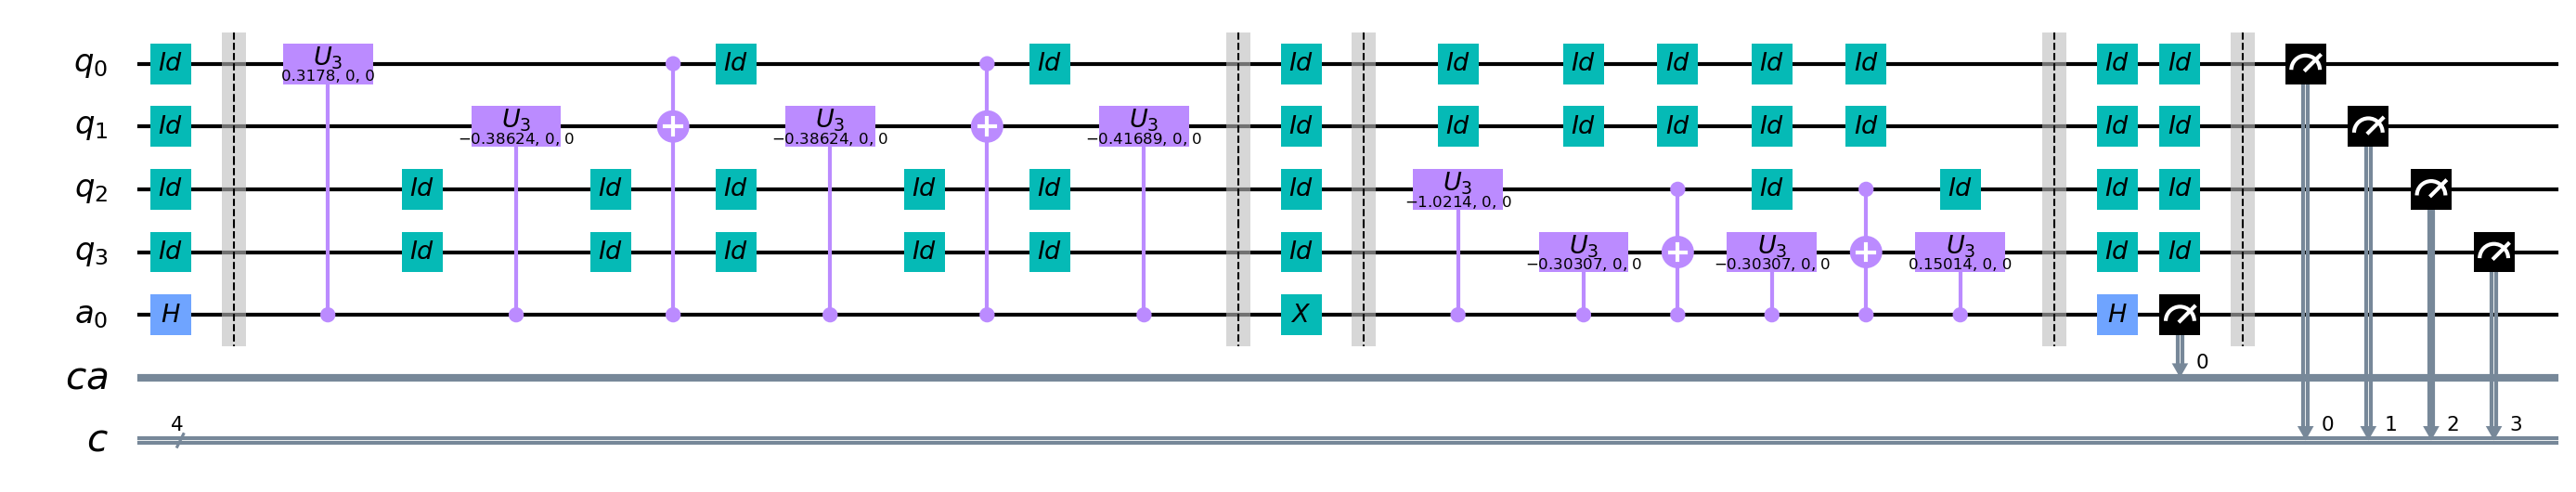
- This is basically two variational layers splined together, plus one ancillary qubit. The teal-color gates are identity gates (they don't do anything; I just put them in to be expliciti).

## TODO
- Matrix form for the (zero-momentum) variational operators, *in the computational basis*. How many Paulis does it project onto?
    - Have some old construction to start with, but it's explicit.
    - Ideally, would want a some block-diagonalizing transformation to go from MC basis to VQE basis.
- Some way to characterize the entaglement in this state (to see how noisy it is when running on an actual q computer). E.g Renyi entropy. 
- A sketch for how the optimizer should work: we won't need a variational simulation, just a set of measurements followed by a classical optimization. 
- For the hackathon: during the Hackathon, I'd like to make progress on packaging all of the above, so that it can be easily scaled to slightly more qubits, and so that error-mitigation techniques could be applied on top of it all.
- Still unclear how bad the noise is going to be...